#### Let's say I am the organiser of a Pokemon tournament (the actual games, not Pokemon GO!). Since legendary pokemon are overpowered, you want to exclude them from the competition. With the line between normal pokemon and legendaries growing thinner and number of legendaries per generation increasing, I need a way to classify them. 

#### Since manually doing it for so many pokemon is hard, let's use a ML classification algorithm. I am giving it the HP, attack , defense, type, spl Atk and Def of a pokemon and asking it to tell me if the pokemon is legendary or not.

#### When I first did this, I thought if I give the classification tree a massive depth, it will give me great accuracy. When my accuracy actually fell when i increased it after a point, I was little confused. Then fortunately for me, sir taught us the concept of overfitting. He said if your model is too complex, its accuracy drops when you use it on test day. I was like 'Damn, thats why my results came out like that'..

### So I am comparing the results I get using different depths for my tree.

In [2]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image

D:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from datetime import datetime

### Results

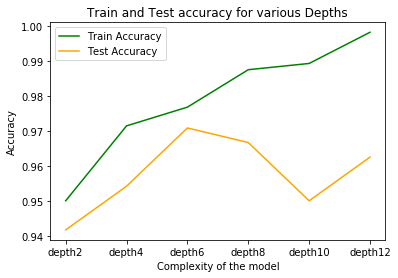

In [47]:
plt.plot(df.Depth, df['Training accuracy'], color='green',label = 'Train Accuracy')
plt.plot(df.Depth, df['Test accuracy'], color='orange',label = 'Test Accuracy')
plt.xlabel('Complexity of the model')
plt.ylabel('Accuracy')
plt.title('Train and Test accuracy for various Depths')
plt.legend(loc="upper left",fontsize = 10)
plt.show()

### Extracting Data

In [5]:
pokemon = pd.read_csv("D:\\Praxis\\ML\\data\\pokemon\\Pokemon.csv")

In [4]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### Splitting data into train and test

In [6]:
X = pokemon[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed','Generation']]
y = pokemon['Legendary']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state = 99)

In [9]:
y_train.shape

(560,)

In [10]:
y_test.shape

(240,)

In [11]:
y_train.value_counts()/len(y_train) 

False    0.917857
True     0.082143
Name: Legendary, dtype: float64

In [12]:
y_test.value_counts()/len(y_test)

False    0.920833
True     0.079167
Name: Legendary, dtype: float64

### Using a max depth of 12 and min_samples_leaf of 1, I get a training set accuracy of 0.9982142857142857 but my test_accuracy is 0.9625

In [142]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 12, min_samples_leaf = 1)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
y_pred
c_test = confusion_matrix(y_test,y_pred)
c 
overall_accuracy_test = 1
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c_test[i][j]
overall_accuracy_test = correct_preds / np.sum(c_test)
print("Overall accuracy for test is {}".format(overall_accuracy_test))

y_pred_train = clf_gini.predict(X_train)
overall_accuracy_train = 1
c_train = confusion_matrix(y_train,y_pred_train)
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c_train[i][j]
overall_accuracy_train = correct_preds / np.sum(c_train)
print("Overall accuracy for train is {}".format(overall_accuracy_train))

Overall accuracy for test is 0.9625
Overall accuracy for train is 0.9982142857142857


### Using a max depth of 10 and min_samples_leaf of 2, I get a training set accuracy of 0.9892857142857143 but my test_accuracy is 0.95

In [139]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 10, min_samples_leaf = 2)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
y_pred
c_test = confusion_matrix(y_test,y_pred)
c 
overall_accuracy_test = 1
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c_test[i][j]
overall_accuracy_test = correct_preds / np.sum(c_test)
print("Overall accuracy for test is {}".format(overall_accuracy_test))

y_pred_train = clf_gini.predict(X_train)
overall_accuracy_train = 1
c_train = confusion_matrix(y_train,y_pred_train)
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c_train[i][j]
overall_accuracy_train = correct_preds / np.sum(c_train)
print("Overall accuracy for train is {}".format(overall_accuracy_train))

Overall accuracy for test is 0.95
Overall accuracy for train is 0.9892857142857143


### Using a max depth of 8 and min_samples_leaf of 3, I get a training set accuracy of 0.9875 and my test_accuracy is 0.9666666666666667

In [95]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 8, min_samples_leaf = 3)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
y_pred
c_test = confusion_matrix(y_test,y_pred)
c
overall_accuracy_test = 1
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c_test[i][j]
overall_accuracy_test = correct_preds / np.sum(c_test)
print("Overall accuracy for test is {}".format(overall_accuracy_test))

y_pred_train = clf_gini.predict(X_train)
overall_accuracy_train = 1
c_train = confusion_matrix(y_train,y_pred_train)
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c_train[i][j]
overall_accuracy_train = correct_preds / np.sum(c_train)
print("Overall accuracy for train is {}".format(overall_accuracy_train))

Overall accuracy for test is 0.9666666666666667
Overall accuracy for train is 0.9875


### Using a max depth of 6 and min_samples_leaf of 10, I get a training set accuracy of 0.9767857142857143 and my test_accuracy is 0.9708333333333333

In [109]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 6, min_samples_leaf = 10)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
y_pred
c_test = confusion_matrix(y_test,y_pred)
c
overall_accuracy_test = 1
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c_test[i][j]
overall_accuracy_test = correct_preds / np.sum(c_test)
print("Overall accuracy for test is {}".format(overall_accuracy_test))

y_pred_train = clf_gini.predict(X_train)
overall_accuracy_train = 1
c_train = confusion_matrix(y_train,y_pred_train)
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c_train[i][j]
overall_accuracy_train = correct_preds / np.sum(c_train)
print("Overall accuracy for train is {}".format(overall_accuracy_train))

Overall accuracy for test is 0.9708333333333333
Overall accuracy for train is 0.9767857142857143


### Using a max depth of 4 and min_samples_leaf of 10, I get a training set accuracy of 0.9714285714285714 and my test_accuracy is 0.9541666666666667

In [132]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 4, min_samples_leaf = 10)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
y_pred
c_test = confusion_matrix(y_test,y_pred)
c
overall_accuracy_test = 1
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c_test[i][j]
overall_accuracy_test = correct_preds / np.sum(c_test)
print("Overall accuracy for test is {}".format(overall_accuracy_test))

y_pred_train = clf_gini.predict(X_train)
overall_accuracy_train = 1
c_train = confusion_matrix(y_train,y_pred_train)
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c_train[i][j]
overall_accuracy_train = correct_preds / np.sum(c_train)
print("Overall accuracy for train is {}".format(overall_accuracy_train))

Overall accuracy for test is 0.9541666666666667
Overall accuracy for train is 0.9714285714285714


### Using a max depth of 2 and min_samples_leaf of 10, I get a training set accuracy of 0.95 and my test_accuracy is 0.9416666666666667

In [135]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 2, min_samples_leaf = 10)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
y_pred
c_test = confusion_matrix(y_test,y_pred)
c
overall_accuracy_test = 1
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c_test[i][j]
overall_accuracy_test = correct_preds / np.sum(c_test)
print("Overall accuracy for test is {}".format(overall_accuracy_test))

y_pred_train = clf_gini.predict(X_train)
overall_accuracy_train = 1
c_train = confusion_matrix(y_train,y_pred_train)
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c_train[i][j]
overall_accuracy_train = correct_preds / np.sum(c_train)
print("Overall accuracy for train is {}".format(overall_accuracy_train))

Overall accuracy for test is 0.9416666666666667
Overall accuracy for train is 0.95


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state = 100)

In [44]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 6, min_samples_leaf = 10)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
y_pred
c_test = confusion_matrix(y_test,y_pred)
overall_accuracy_test = 1
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c_test[i][j]
overall_accuracy_test = correct_preds / np.sum(c_test)
print("Overall accuracy for test is {}".format(overall_accuracy_test))

y_pred_train = clf_gini.predict(X_train)
overall_accuracy_train = 1
c_train = confusion_matrix(y_train,y_pred_train)
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c_train[i][j]
overall_accuracy_train = correct_preds / np.sum(c_train)
print("Overall accuracy for train is {}".format(overall_accuracy_train))

Overall accuracy for test is 0.9708333333333333
Overall accuracy for train is 0.9767857142857143


### Visualizing classification results

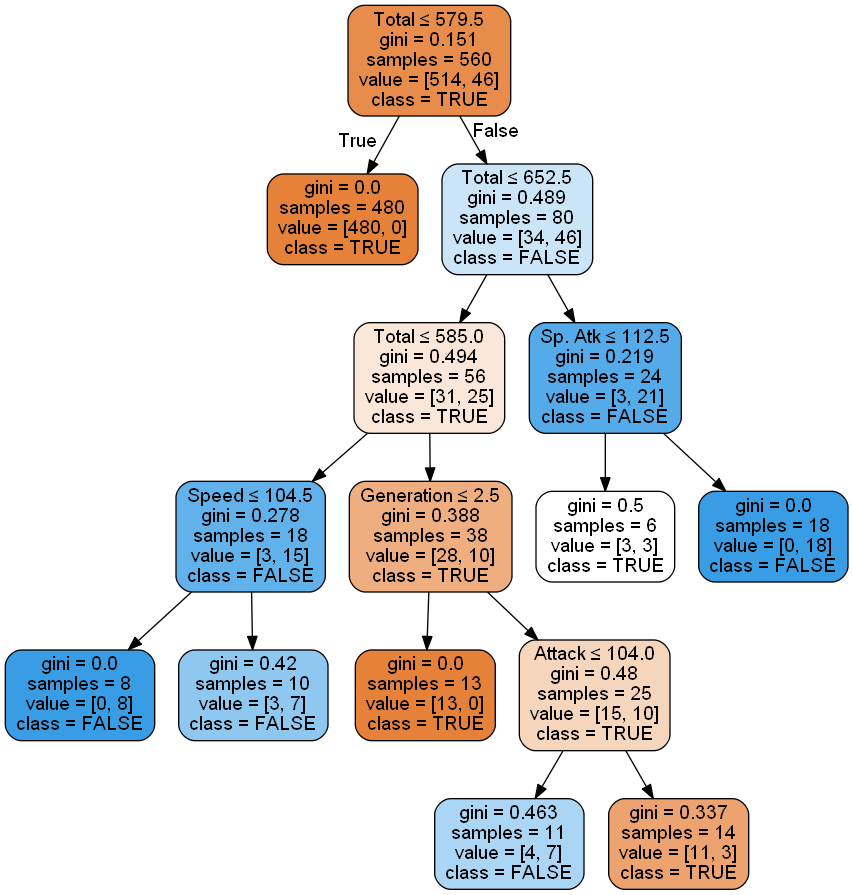

In [22]:
dot_data = StringIO()
tree.export_graphviz(clf_gini,
 out_file=dot_data, 
 class_names=[ 'TRUE','FALSE'],# the target names.
 feature_names=['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed','Generation'], # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [46]:
data = [['depth2', 0.95,0.9416666666666667], 
        ['depth4', 0.9714285714285714,0.9541666666666667], 
        ['depth6', 0.9767857142857143,0.9708333333333333],
        ['depth8', 0.9875,0.9666666666666667],
        ['depth10', 0.9892857142857143,0.95],
        ['depth12', 0.9982142857142857,0.9625]
       ] 
        
        
df = pd.DataFrame(data, columns = ['Depth', 'Training accuracy','Test accuracy'])
df

,Depth,Training accuracy,Test accuracy
0,depth2,0.950000,0.941667
1,depth4,0.971429,0.954167
2,depth6,0.976786,0.970833
3,depth8,0.987500,0.966667
4,depth10,0.989286,0.950000
5,depth12,0.998214,0.962500


In [42]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [ ]:
X_train, X_test, y_train, y_test